In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nazishqureshi","key":"f05b65e3dc25239d793506975a4f8b6b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown


In [ ]:
!unzip plantdisease.zip -d /content/plantdisease

Streaming output truncated to the last 5000 lines.
  inflating: /content/plantdisease/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: /content/plantdisease/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: /content/plantdisease/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: /content/plantdisease/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: /content/plantdisease/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: /content/plantdisease/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf__

In [ ]:
import os

image_dir = '/content/plantdisease/PlantVillage'
if not os.path.exists(image_dir):
    print("Directory not found!")
else:
    print("Directory found. Total images:", len(os.listdir(image_dir)))


Directory found. Total images: 15


In [ ]:
import os

for root, dirs, files in os.walk(image_dir):
    print(f"Directory: {root}, Total Files: {len(files)}")

Directory: /content/plantdisease/PlantVillage, Total Files: 0
Directory: /content/plantdisease/PlantVillage/Tomato_Early_blight, Total Files: 1000
Directory: /content/plantdisease/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus, Total Files: 3209
Directory: /content/plantdisease/PlantVillage/Tomato_Late_blight, Total Files: 1909
Directory: /content/plantdisease/PlantVillage/Potato___Late_blight, Total Files: 1000
Directory: /content/plantdisease/PlantVillage/Pepper__bell___healthy, Total Files: 1478
Directory: /content/plantdisease/PlantVillage/Tomato_Leaf_Mold, Total Files: 952
Directory: /content/plantdisease/PlantVillage/Pepper__bell___Bacterial_spot, Total Files: 997
Directory: /content/plantdisease/PlantVillage/Tomato_healthy, Total Files: 1591
Directory: /content/plantdisease/PlantVillage/Tomato__Target_Spot, Total Files: 1404
Directory: /content/plantdisease/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite, Total Files: 1676
Directory: /content/plantdisease/PlantVilla

In [ ]:
# Import Libraries
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Dropout

Total images found: 20638


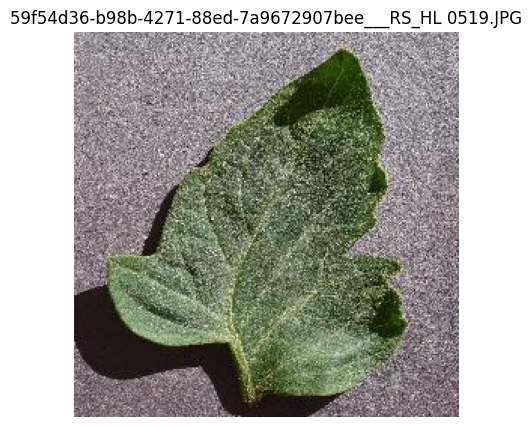

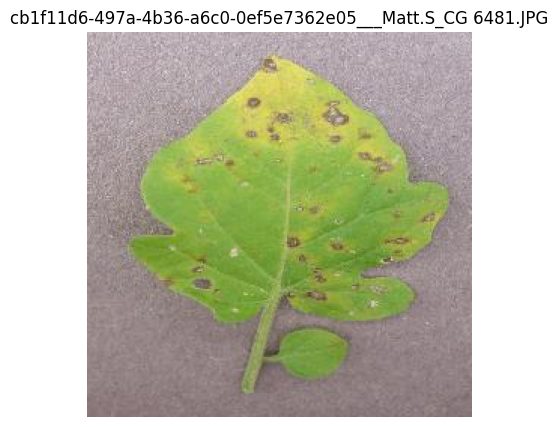

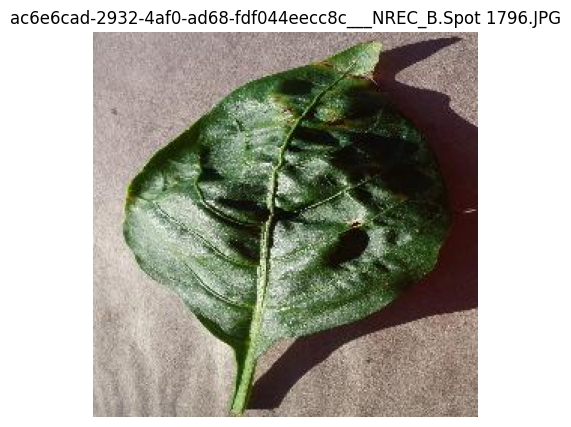

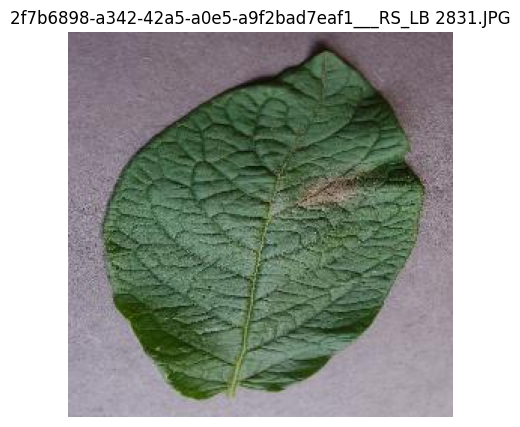

In [ ]:
# Get all image paths from subdirectories
image_dir = '/content/plantdisease/PlantVillage'
image_files = []
for root, _, files in os.walk(image_dir):
    image_files.extend([os.path.join(root, f) for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

# Confirm number of images found
print(f"Total images found: {len(image_files)}")

# Select 4 random images for display
random_images = random.sample(image_files, 4)

# Display the images
for image_file in random_images:
    try:
        img = mpimg.imread(image_file)
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.title(os.path.basename(image_file))
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error loading image {image_file}: {e}")


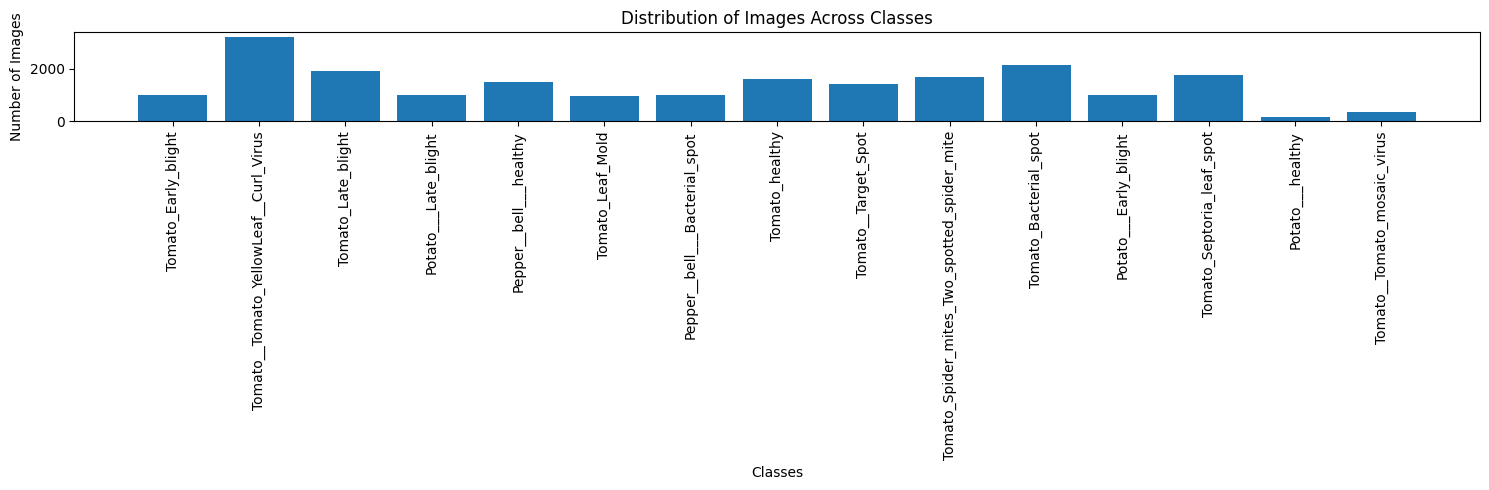

In [ ]:
# Distribution graphs

image_dir = '/content/plantdisease/PlantVillage'
class_counts = {}

for root, _, files in os.walk(image_dir):
    class_name = os.path.basename(root)
    if class_name != 'PlantVillage':
        class_counts[class_name] = len(files)

# Create the distribution graph
classes = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(15, 5))  # Adjust figure size as needed
plt.bar(classes, counts)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Distribution of Images Across Classes")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Data preprocessing

# Create a DataFrame for easier data handling
image_data = pd.DataFrame({'image_path': image_files})

# Extract class labels from file paths
image_data['class'] = image_data['image_path'].apply(lambda x: x.split('/')[-2])

# Split data into training and validation sets
train_df, val_df = train_test_split(image_data, test_size=0.2, random_state=42, stratify=image_data['class'])

# Data Augmentation using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Define image dimensions and batch size
image_size = (224, 224)
batch_size = 32

In [ ]:
# Create data generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical' # or 'sparse' depending on your model
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image_path',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical' # or 'sparse' depending on your model
)


print(f"Number of training samples: {len(train_df)}")
print(f"Number of validation samples: {len(val_df)}")

Found 16510 validated image filenames belonging to 15 classes.
Found 4128 validated image filenames belonging to 15 classes.
Number of training samples: 16510
Number of validation samples: 4128


# **MobileNetV2**

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(768, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dense(15, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
import tensorflow as tf

# Define faster callbacks
earlystopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

learning_rate = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    patience=1,
    factor=0.5,
    verbose=1
)

# (Optional) You can still keep checkpoint if you want, but commented for speed
# checkpoint = tf.keras.callbacks.ModelCheckpoint(
#     'checkpoint.keras',
#     monitor='val_loss',
#     save_best_only=True,
#     mode='min'
# )

# Train the model (FASTER)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=50,         # only 50 batches per epoch
    validation_steps=20,        # only 20 batches for validation
    callbacks=[earlystopping, learning_rate]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.2170 - loss: 15.5812 - val_accuracy: 0.5891 - val_loss: 1.3450 - learning_rate: 0.0010
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.5458 - loss: 1.4609 - val_accuracy: 0.6531 - val_loss: 1.1040 - learning_rate: 0.0010
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 174s 4s/step - accuracy: 0.6067 - loss: 1.2455 - val_accuracy: 0.6625 - val_loss: 0.9981 - learning_rate: 0.0010
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.6305 - loss: 1.1637 - val_accuracy: 0.7688 - val_loss: 0.6961 - learning_rate: 0.0010
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6841 - loss: 1.0385
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
50/50 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.6842 - loss: 1.0376 - val_accuracy: 0.7281 - val_loss: 0.7447 - learning_rate: 0.0010
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.7086 - loss: 0.8812 - val_accur

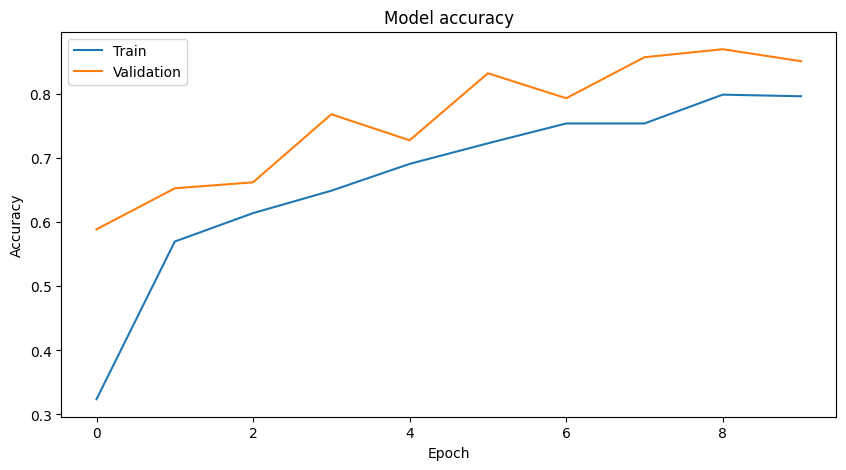

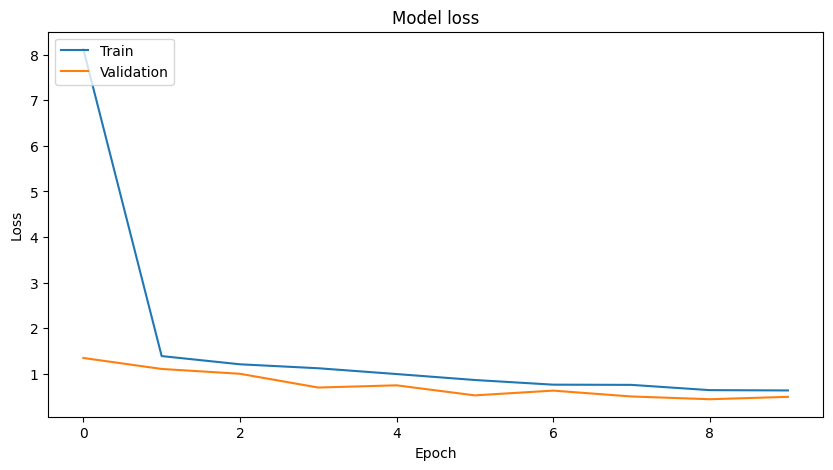

In [ ]:
# Plot graph

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# **ResNet50 Model**

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 487s 10s/step - accuracy: 0.1090 - loss: 12.2647 - val_accuracy: 0.1703 - val_loss: 2.5821 - learning_rate: 0.0010
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 494s 10s/step - accuracy: 0.1310 - loss: 2.6278 - val_accuracy: 0.1516 - val_loss: 2.5687 - learning_rate: 0.0010
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 442s 9s/step - accuracy: 0.1231 - loss: 2.5935 - val_accuracy: 0.2375 - val_loss: 2.3647 - learning_rate: 0.0010
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.1465 - loss: 2.4920
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
50/50 ━━━━━━━━━━━━━━━━━━━━ 440s 9s/step - accuracy: 0.1464 - loss: 2.4918 - val_accuracy: 0.0922 - val_loss: 2.5524 - learning_rate: 0.0010
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1693 - loss: 2.4493
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
50/50 ━━━━━━━━━━━━━━━━━━━━ 420s 8s/

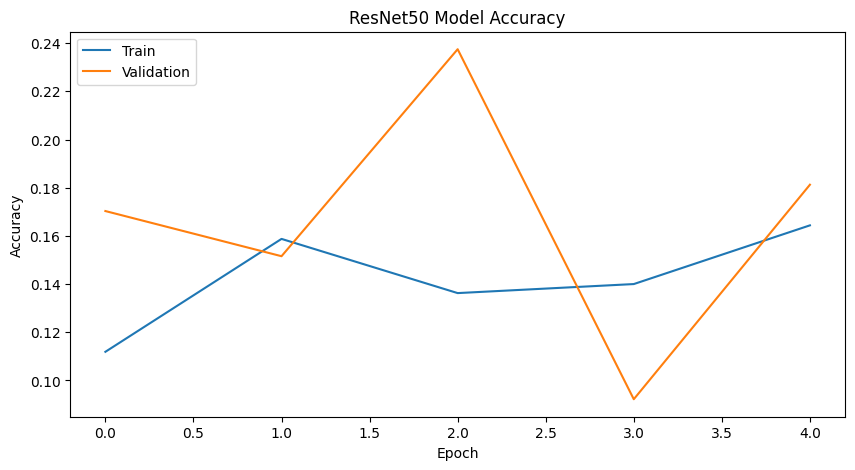

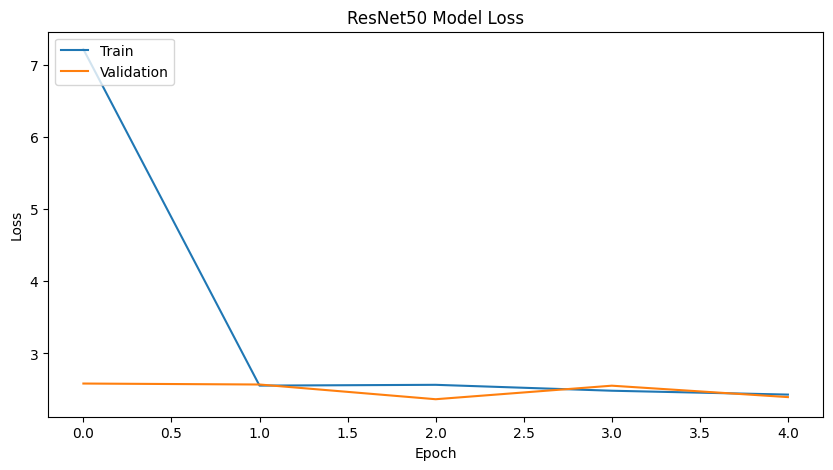

In [ ]:
# Import
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf

# Callbacks (reuse or redefine faster ones)
earlystopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

learning_rate = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    patience=1,
    factor=0.5,
    verbose=1
)

# Build ResNet50 model
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_resnet.trainable = False  # Freeze pre-trained layers

x = Flatten()(base_model_resnet.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dense(15, activation='softmax')(x)

model_resnet = tf.keras.Model(inputs=base_model_resnet.input, outputs=x)

# Compile model
model_resnet.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train model (FASTER: limited steps and epochs)
history_resnet = model_resnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,                      # Faster training (was 25)
    steps_per_epoch=50,              # Only 50 steps per epoch
    validation_steps=20,             # Only 20 steps for validation
    callbacks=[earlystopping, learning_rate]
)

# Plot training & validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('ResNet50 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('ResNet50 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# **EfficientNetB0 Model**

In [ ]:
# Import
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf

# (Reuse the same faster callbacks: earlystopping, learning_rate)

# Build EfficientNetB0 model
base_model_efficientnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_efficientnet.trainable = False  # Freeze pre-trained layers

x = Flatten()(base_model_efficientnet.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dense(15, activation='softmax')(x)

model_efficientnet = tf.keras.Model(inputs=base_model_efficientnet.input, outputs=x)

# Compile model
model_efficientnet.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train model (FASTER)
history_efficientnet = model_efficientnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,                       # Reduced epochs (was 25)
    steps_per_epoch=50,               # Only 50 steps per epoch
    validation_steps=20,              # Only 20 steps for validation
    callbacks=[earlystopping, learning_rate]
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 213s 4s/step - accuracy: 0.0867 - loss: 19.8222 - val_accuracy: 0.1688 - val_loss: 2.6775 - learning_rate: 0.0010
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.1127 - loss: 2.6973 - val_accuracy: 0.0938 - val_loss: 2.6072 - learning_rate: 0.0010
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1175 - loss: 2.6272
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
50/50 ━━━━━━━━━━━━━━━━━━━━ 208s 4s/step - accuracy: 0.1178 - loss: 2.6272 - val_accuracy: 0.1484 - val_loss: 2.6289 - learning_rate: 0.0010
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 204s 4s/step - accuracy: 0.1474 - loss: 2.6212 - val_accuracy: 0.1453 - val_loss: 2.5922 - learning_rate: 5.0000e-04
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 267s 5s/step - accuracy: 0.1577 - loss: 2.6173 - val_accuracy: 0.1625 - val_loss: 2.5659 - learning_rate: 5.0000e-04
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━

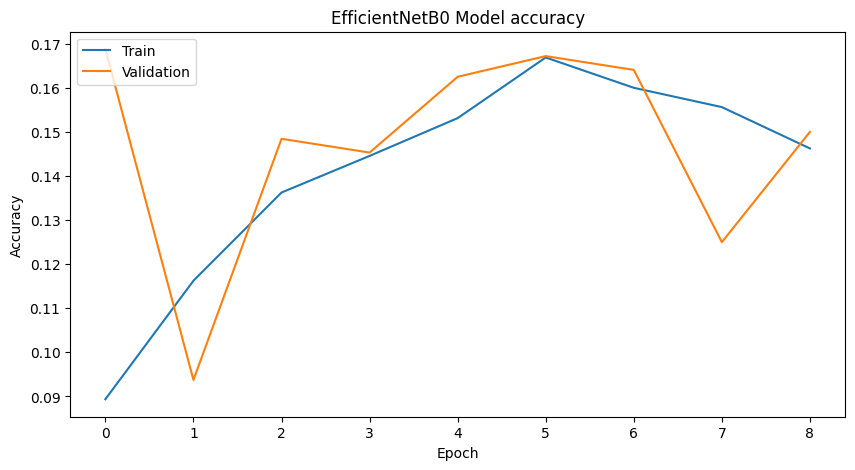

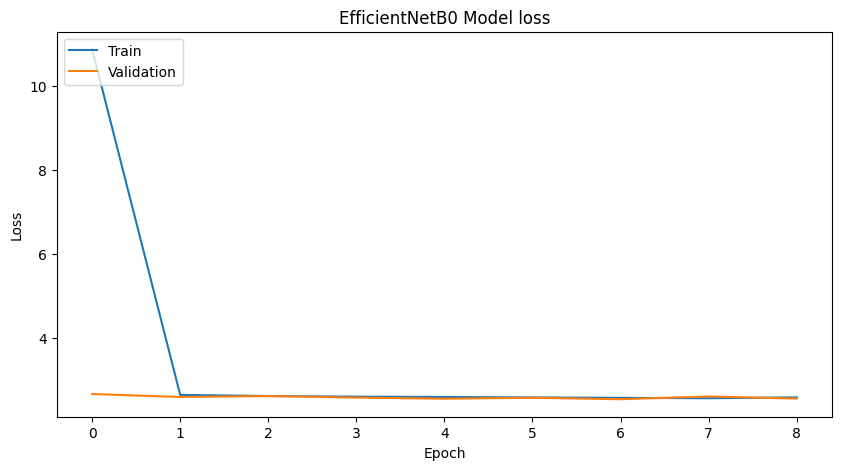

In [ ]:
# Plot training & validation accuracy values for EfficientNetB0
plt.figure(figsize=(10, 5))
plt.plot(history_efficientnet.history['accuracy'])
plt.plot(history_efficientnet.history['val_accuracy'])
plt.title('EfficientNetB0 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values for EfficientNetB0
plt.figure(figsize=(10, 5))
plt.plot(history_efficientnet.history['loss'])
plt.plot(history_efficientnet.history['val_loss'])
plt.title('EfficientNetB0 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



In [ ]:
# CNN + LSTM hybrid model for image classification
# Base layer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, TimeDistributed, LSTM, Dense, Flatten, Dropout, Reshape, BatchNormalization

model = Sequential()

# Step 1: CNN feature extractor
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

# Step 2: Reshape CNN output into sequences for LSTM
timesteps = 30 * 30  # or calculate based on CNN output shape
features = 64

# Now reshape to (timesteps, features)
model.add(Reshape((timesteps, features)))  # Shape: (timesteps, features)

# Step 3: LSTM for sequential learning
model.add(LSTM(64, return_sequences=False))

# Step 4: Fully connected output
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))  # Make sure num_classes is defined

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 900, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,055 (246.31 KB)

 Trainable params: 62,863 (245.56 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, TimeDistributed, Reshape

# CNN + LSTM Model
cnn_lstm_model = Sequential()

# CNN part
cnn_lstm_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
cnn_lstm_model.add(MaxPooling2D((2,2)))
cnn_lstm_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_lstm_model.add(MaxPooling2D((2,2)))

# Get the output shape of the last CNN layer
cnn_output_shape = cnn_lstm_model.layers[-1].output.shape  # Use output.shape

# Reshape for LSTM input, ensuring total size remains the same
cnn_lstm_model.add(Reshape((cnn_output_shape[1] * cnn_output_shape[2], cnn_output_shape[3])))

# LSTM part
cnn_lstm_model.add(LSTM(64))
cnn_lstm_model.add(Dense(512, activation='relu'))
cnn_lstm_model.add(Dense(15, activation='softmax'))  # 15 classes

# Compile model
cnn_lstm_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train model
history_cnn_lstm = cnn_lstm_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=50,
    validation_steps=20,
    callbacks=[earlystopping, learning_rate]
)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 267s 5s/step - accuracy: 0.1308 - loss: 2.6486 - val_accuracy: 0.1437 - val_loss: 2.5913 - learning_rate: 0.0010
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 323s 6s/step - accuracy: 0.1366 - loss: 2.6067 - val_accuracy: 0.1500 - val_loss: 2.5490 - learning_rate: 0.0010
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 261s 5s/step - accuracy: 0.1611 - loss: 2.5643 - val_accuracy: 0.1984 - val_loss: 2.4716 - learning_rate: 0.0010
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 265s 5s/step - accuracy: 0.1741 - loss: 2.5236 - val_accuracy: 0.1719 - val_loss: 2.3906 - learning_rate: 0.0010
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1646 - loss: 2.4385
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
50/50 ━━━━━━━━━━━━━━━━━━━━ 321s 6s/step - accuracy: 0.1650 - loss: 2.4384 - val_accuracy: 0.1734 - val_loss: 2.4287 - learning_rate: 0.0010
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 254s 5s/step - accuracy: 0.2359 - loss: 2.3120 - val_accura

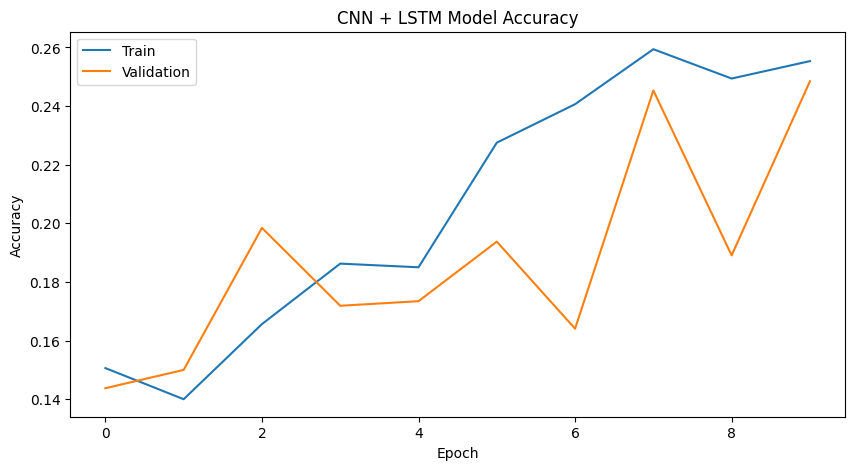

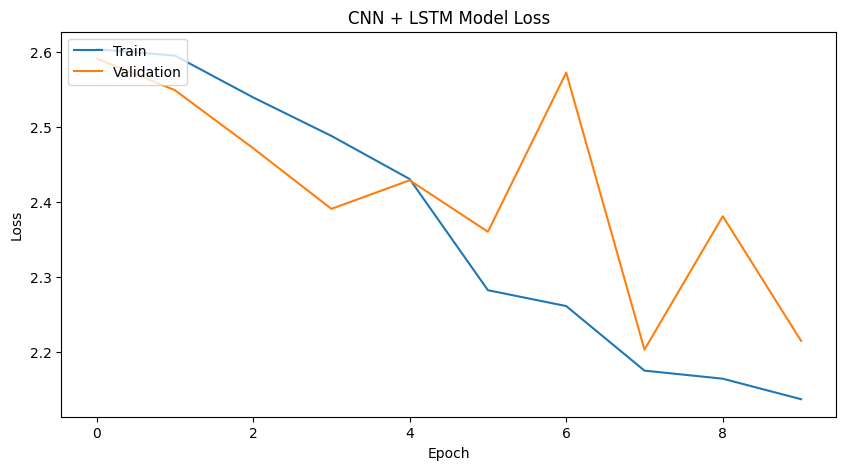

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_cnn_lstm.history['accuracy'])
plt.plot(history_cnn_lstm.history['val_accuracy'])
plt.title('CNN + LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history_cnn_lstm.history['loss'])
plt.plot(history_cnn_lstm.history['val_loss'])
plt.title('CNN + LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

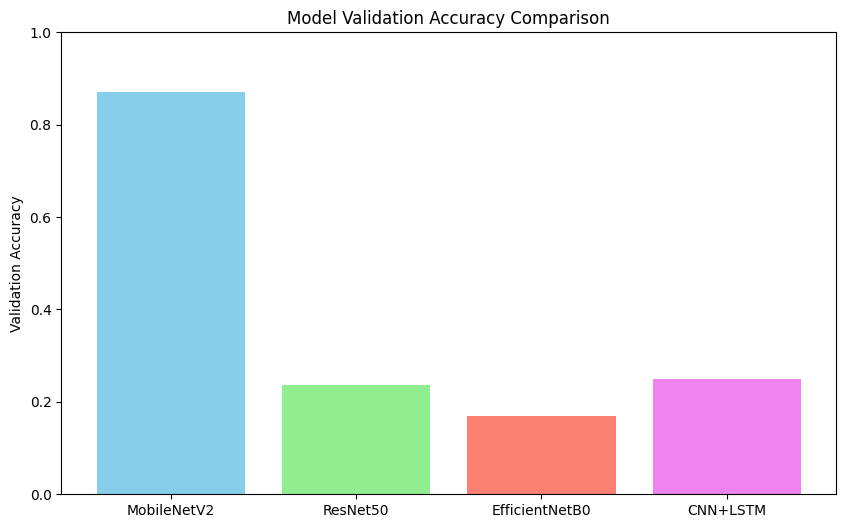

In [ ]:
# Gather best validation accuracies
val_acc_mobilenet = max(history.history['val_accuracy'])  # MobileNetV2
val_acc_resnet = max(history_resnet.history['val_accuracy'])        # ResNet50
val_acc_efficientnet = max(history_efficientnet.history['val_accuracy'])  # EfficientNetB0
val_acc_cnn_lstm = max(history_cnn_lstm.history['val_accuracy'])     # CNN + LSTM

# Plot comparison bar chart
models = ['MobileNetV2', 'ResNet50', 'EfficientNetB0', 'CNN+LSTM']
val_accuracies = [val_acc_mobilenet, val_acc_resnet, val_acc_efficientnet, val_acc_cnn_lstm]

plt.figure(figsize=(10,6))
plt.bar(models, val_accuracies, color=['skyblue', 'lightgreen', 'salmon', 'violet'])
plt.title('Model Validation Accuracy Comparison')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
plt.show()

In [ ]:
pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.0 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Assume you already have your trained models:
# model_mobilenetv2, model_resnet, model_efficientnet, model_cnn_lstm

# Class labels for prediction (your 15 class names)
class_labels = ['class1', 'class2', 'class3', 'class4', 'class5',
                'class6', 'class7', 'class8', 'class9', 'class10',
                'class11', 'class12', 'class13', 'class14', 'class15']
# Update above with your actual class labels!

# Prediction function
def predict(img, model_name):
    # Preprocess the input image
    img = img.resize((224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize

    # Select model
    if model_name == "MobileNetV2":
        model = model_mobilenetv2
    elif model_name == "ResNet50":
        model = model_resnet
    elif model_name == "EfficientNetB0":
        model = model_efficientnet
    elif model_name == "CNN+LSTM":
        model = model_cnn_lstm
    else:
        return "Invalid model selected"

    # Make prediction
    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    class_name = class_labels[class_index]
    return f"Predicted Class: {class_name}"

# Gradio Interface
interface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Image(type="pil"),
        gr.Dropdown(["MobileNetV2", "ResNet50", "EfficientNetB0", "CNN+LSTM"], label="Select Model")
    ],
    outputs="text",
    title="Image Classification - Multi Model",
    description="Upload an image and select a model to predict the class!"
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://569cc00f1541dab022.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
